In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
positions = train_data['position'].unique()
train_data.head(10)

,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,league_name,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_name,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position
0,216302,E. García,71,71,1400000.0,10000,1989-12-28,176,73,Club Atlético de San Luis,Mexican Liga MX,1,29,NaN,2021-07-12,2026,Mexico,NaN,Right,5,3,1,Medium/High,Normal (170-185),No,2400000.0,NaN,Early Crosser,70.0,52.0,60.0,70.0,67.0,66.0,64,40,56,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,58,66,56,79,53,48,58,66,65,66,65,14,11,12,12,12,NaN,LB
1,237867,D. Cancola,65,71,1000000.0,2000,1996-10-23,183,73,Ross County FC,Scottish Premiership,1,4,NaN,2021-07-23,2022,Austria,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,2000000.0,NaN,NaN,65.0,38.0,58.0,60.0,63.0,67.0,50,31,59,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,66,42,66,66,48,62,46,59,65,61,58,10,13,7,6,11,NaN,LDM
2,253472,E. Kahl,65,77,1600000.0,2000,2001-09-27,178,69,Aarhus GF,Danish Superliga,1,19,NaN,2021-07-24,2026,Sweden,NaN,Left,3,3,1,High/Medium,Normal (170-185),No,2300000.0,NaN,Speed Dribbler (AI),79.0,35.0,58.0,66.0,59.0,64.0,59,30,53,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,61,28,69,62,58,60,31,65,60,58,59,10,10,8,10,11,NaN,LWB
3,223994,S. Mugoša,72,72,2300000.0,5000,1992-02-26,188,81,Incheon United FC,Korean K League 1,1,9,NaN,2018-02-08,2023,Montenegro,NaN,Right,3,3,1,High/Medium,Lean (185+),No,2900000.0,NaN,Finesse Shot,64.0,74.0,51.0,68.0,24.0,76.0,32,78,75,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,87,69,52,18,76,60,75,75,16,22,19,16,15,13,8,9,NaN,LS
4,251635,A. Țigănașu,65,65,525000.0,3000,1990-06-12,179,74,FC Botoşani,Romanian Liga I,1,30,NaN,2019-07-01,2022,Romania,NaN,Left,2,2,1,Medium/High,Normal (170-185),No,709000.0,NaN,Solid Player,74.0,53.0,59.0,53.0,61.0,69.0,64,38,49,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,70,67,53,63,60,52,52,58,64,61,58,12,5,11,12,15,NaN,LB
5,219575,C. Bordacahar,68,68,1200000.0,500,1991-10-27,183,70,FBC Melgar,Peruvian Primera División,1,7,NaN,2021-01-27,2021,Argentina,NaN,Right,3,3,1,High/Medium,Normal (170-185),No,2600000.0,NaN,NaN,76.0,65.0,60.0,68.0,27.0,57.0,70,68,67,65,53,70,40,36,51,67,77,75,70,70,64,66,76,70,59,60,31,16,62,60,66,59,23,27,22,14,12,15,9,15,NaN,RW
6,200316,T. Horn,76,78,6500000.0,21000,1993-05-12,192,90,1. FC Köln,German 1. Bundesliga,1,1,NaN,2011-07-01,2023,Germany,NaN,Left,2,1,2,Medium/Medium,Normal (185+),Yes,12200000.0,NaN,Cautious With Crosses,NaN,NaN,NaN,NaN,NaN,NaN,19,13,14,30,14,20,12,15,29,22,45,51,50,79,31,45,64,31,67,17,41,22,15,45,21,25,14,13,12,77,77,60,70,78,47.0,GK
7,222199,Zheng Kaimu,59,59,220000.0,2000,1992-01-28,186,80,Shijiazhuang Ever Bright F.C.,Chinese Super League,1,16,NaN,2021-04-19,2021,China PR,NaN,Right,3,2,1,High/Medium,Normal (185+),No,341000.0,NaN,NaN,67.0,49.0,52.0,54.0,60.0,76.0,31,54,64,60,34,49,40,38,59,58,67,67,59,64,52,46,77,78,79,48,67,63,51,59,33,51,57,60,60,14,8,15,15,15,NaN,LCM
8,234172,B. Bese,69,69,1300000.0,7000,1994-05-06,188,84,Oud-Heverlee Leuven,Belgian Jupiler Pro League,1,18,NaN,2020-08-19,2022,Hungary,NaN,Right,3,3,1,Medium/Medium,Normal (185+)

We see that goalkeeping_speed is missing for every position except GK

In [2]:
position_gk_missing_values = train_data[train_data['position'] == 'GK'].isna().sum().sort_values(ascending=False)
print(position_gk_missing_values[position_gk_missing_values > 0])
print(train_data[train_data['position']=='GK'].shape)
train_data[train_data['position']=='GK'].head()

passing                 631
player_tags             631
pace                    631
physic                  631
defending               631
dribbling               631
shooting                631
club_loaned_from        598
nation_jersey_number    571
player_traits           251
release_clause_eur       33
club_joined              33
dtype: int64
(631, 70)


,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,league_name,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_name,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position
6,200316,T. Horn,76,78,6500000.0,21000,1993-05-12,192,90,1. FC Köln,German 1. Bundesliga,1,1,NaN,2011-07-01,2023,Germany,NaN,Left,2,1,2,Medium/Medium,Normal (185+),Yes,12200000.0,NaN,Cautious With Crosses,NaN,NaN,NaN,NaN,NaN,NaN,19,13,14,30,14,20,12,15,29,22,45,51,50,79,31,45,64,31,67,17,41,22,15,45,21,25,14,13,12,77,77,60,70,78,47.0,GK
11,234642,É. Mendy,83,85,30000000.0,105000,1992-03-01,197,86,Chelsea,English Premier League,1,16,NaN,2020-09-24,2025,Senegal,NaN,Right,2,1,2,Medium/Medium,Lean (185+),Yes,57800000.0,NaN,"Leadership, Comes For Crosses",NaN,NaN,NaN,NaN,NaN,NaN,10,5,10,39,9,13,13,14,46,31,36,33,48,80,27,59,39,35,72,9,22,13,6,44,13,57,10,11,13,83,82,78,81,84,35.0,GK
19,234833,F. Müller,77,82,13000000.0,18000,1997-11-13,190,88,VfB Stuttgart,German 1. Bundesliga,1,1,NaN,2021-07-01,2025,Germany,NaN,Left,4,1,1,Medium/Medium,Normal (185+),Yes,24400000.0,NaN,Cautious With Crosses,NaN,NaN,NaN,NaN,NaN,NaN,12,11,11,32,10,18,13,12,28,24,43,43,42,75,41,54,58,34,67,12,25,19,11,42,19,38,20,11,12,76,74,72,73,81,43.0,GK
34,236239,A. Whiteman,64,75,1100000.0,10000,1998-10-02,189,84,Degerfors IF,Swedish Allsvenskan,1,1,Tottenham Hotspur,NaN,2021,England,NaN,Right,2,1,1,Medium/Medium,Normal (185+),Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,9,14,27,8,12,12,10,25,23,34,28,31,52,41,44,65,26,48,9,25,12,4,39,11,42,21,13,14,66,61,59,62,68,32.0,GK
52,260323,M. Murakami,63,64,375000.0,900,1992-08-07,185,85,Avispa Fukuoka,Japanese J. League Division 1,1,31,NaN,2020-02-01,2022,Japan,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,497000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,8,10,33,9,6,14,10,30,17,29,20,23,52,58,47,64,28,60,7,35,7,4,53,16,41,9,10,12,66,64,62,60,65,25.0,GK


In [3]:
test_data.head()

,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,league_name,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_name,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,215562,R. Hunt,63,63,475000.0,3000,1995-07-07,171,67,Swindon Town,English League Two,4,24,NaN,2019-06-24,2022,England,NaN,Right,5,2,1,High/Medium,Normal (170-185),No,831000.0,NaN,NaN,76.0,33.0,55.0,64.0,56.0,62.0,62,29,50,57,23,61,62,55,51,59,74,77,84,55,88,45,84,80,55,28,51,57,51,44,36,57,54,59,58,15,12,12,11,15,NaN
1,248311,Tiri,64,64,500000.0,950,1991-07-14,186,84,ATK Mohun Bagan FC,Indian Super League,1,44,NaN,2020-09-12,2023,Spain,NaN,Left,3,2,1,Medium/Medium,Normal (185+),No,675000.0,NaN,"Leadership, Power Header",65.0,38.0,53.0,52.0,62.0,78.0,60,28,62,56,55,53,31,35,57,50,64,66,52,59,45,56,88,74,83,38,66,59,43,48,33,55,63,63,64,9,14,9,11,6,NaN
2,223933,G. Nilsson,64,70,925000.0,2000,1997-05-23,197,87,SV Wehen Wiesbaden,German 3. Bundesliga,3,29,NaN,2021-01-05,2023,Sweden,NaN,Right,2,2,1,Medium/Medium,Lean (185+),No,1500000.0,NaN,Injury Prone,77.0,62.0,48.0,59.0,27.0,71.0,35,63,68,56,61,61,47,38,44,62,73,80,44,59,48,67,50,69,79,56,59,20,60,53,65,55,23,25,19,6,7,8,16,14,NaN
3,232546,D. Zabala,72,72,2300000.0,13000,1991-09-19,172,64,Rosario Central,Argentina Primera División,1,8,NaN,2019-07-03,2022,Uruguay,NaN,Right,3,3,1,High/Medium,Stocky (170-185),No,3500000.0,NaN,NaN,72.0,73.0,72.0,71.0,41.0,63.0,75,73,59,71,66,71,62,64,68,73,75,69,72,64,74,76,66,70,75,76,25,30,68,76,62,63,43,39,40,11,15,8,11,14,NaN
4,189217,P. Pawlett,63,63,450000.0,2000,1991-02-03,178,68,Dundee United,Scottish Premiership,1,8,NaN,2019-01-31,2023,Scotland,NaN,Right,4,3,1,High/Medium,Normal (170-185),No,788000.0,NaN,"Injury Prone, Speed Dribbler (AI)",82.0,60.0,63.0,66.0,55.0,67.0,64,60,42,64,53,65,65,63,62,64,83,81,80,60,74,66,81,74,66,58,57,55,61,62,52,57,56,58,55,9,16,13,16,8,NaN


In [4]:
train_data['position'].value_counts()

position
RCB    631
GK     631
LCB    631
RB     463
LB     463
ST     428
RCM    423
LCM    423
RM     369
LM     369
CAM    263
RDM    201
LS     201
RS     201
LDM    201
CB     167
RW     166
LW     166
CDM    151
LWB    104
RWB    104
CM      75
LF      32
RF      32
Name: count, dtype: int64

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


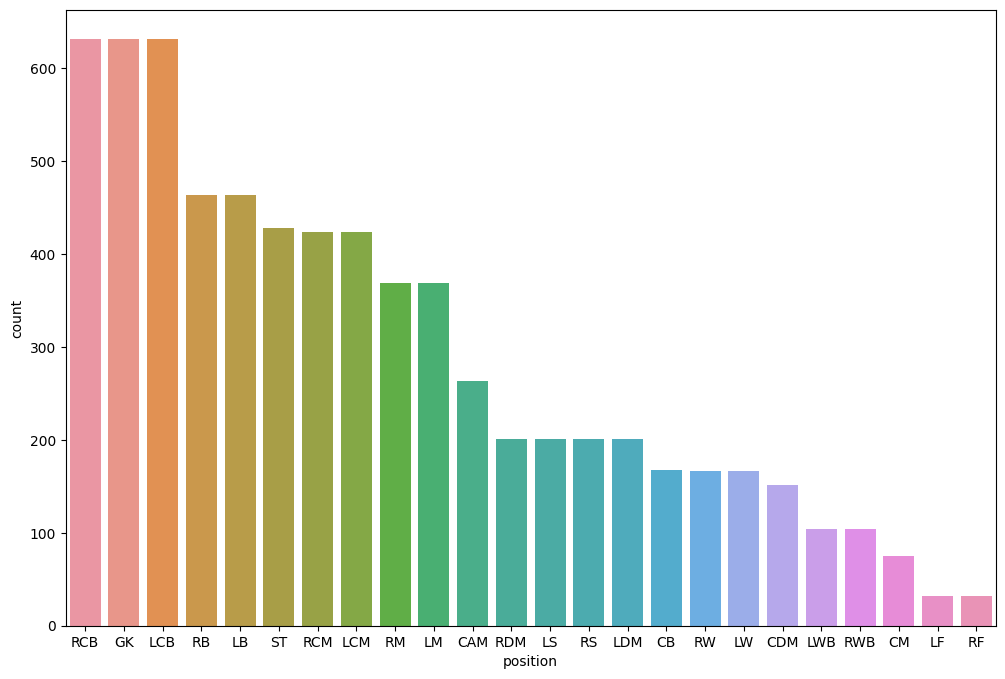

In [5]:
plt.figure(figsize=(12, 8))
position_order = train_data['position'].value_counts().index.tolist()
sns.countplot(data=train_data, x='position', order=position_order)
plt.show()

We see that for GK there are no values in passing, pace, physic, defending, dribbling and shooting, as for the other positions they don't have goalkeeping speed.
We can assume that is because those are no relevant traits for each specific position so we will leave them as 0.

In [6]:
# Adding 0 to the missing irrelevant traits for each position
miss_traits = ['passing', 'pace', 'physic', 'defending', 'dribbling', 'shooting', 'goalkeeping_speed']
train_data[miss_traits] = train_data[miss_traits].fillna(0)
test_data[miss_traits] = test_data[miss_traits].fillna(0)

Now we check for more missing values in our data

In [7]:
# Checking for other missing values
print("Shape of train_data:", train_data.shape)
missing_percentage = (train_data.isna().sum() / train_data.shape[0]) * 100
missing_data_columns = missing_percentage[missing_percentage > 0]
print("\nColumns with missing data and their percentage:")
print(missing_data_columns)

Shape of train_data: (6895, 70)

Columns with missing data and their percentage:
value_eur                0.029007
club_loaned_from        94.909355
club_joined              5.090645
nation_jersey_number    94.010152
release_clause_eur       5.119652
player_tags             88.817984
player_traits           37.548949
dtype: float64


In [8]:
# Checking for other missing values
print("Shape of test_data:", test_data.shape)
missing_percentage = (test_data.isna().sum() / test_data.shape[0]) * 100
missing_data_columns = missing_percentage[missing_percentage > 0]
print("\nColumns with missing data and their percentage:")
print(missing_data_columns)


Shape of test_data: (767, 69)

Columns with missing data and their percentage:
value_eur                0.391134
club_loaned_from        94.132986
club_joined              5.867014
nation_jersey_number    93.350717
release_clause_eur       6.258149
player_tags             88.917862
player_traits           37.157757
dtype: float64


Checking the % of missing values for each grouped position and if all of them are more than 70%

In [9]:
columns_with_high_missing_data_all_positions = set()

for position in positions:
    train_data_position = train_data[train_data['position'] == position].reset_index(drop=True)

    # Check for missing values and calculate the percentage of missing data for each column
    missing_percentage = (train_data_position.isna().sum() / train_data_position.shape[0]) * 100

    # Check which columns have more than 80% missing data
    columns_with_high_missing_data = set(missing_percentage[missing_percentage > 60].index)

    # Update the set with columns that have more than 80% missing data for the current position
    if not columns_with_high_missing_data_all_positions:
        columns_with_high_missing_data_all_positions.update(columns_with_high_missing_data)
    else:
        columns_with_high_missing_data_all_positions.intersection_update(columns_with_high_missing_data)

# Print the final set of columns with more than 80% missing data across all positions
print("Columns with more than 60% missing data across all positions:")
print(columns_with_high_missing_data_all_positions)

Columns with more than 60% missing data across all positions:
{'player_tags', 'club_loaned_from', 'nation_jersey_number'}


Dropping all the columns previously obtained

In [10]:
train_data = train_data.drop(columns=['club_loaned_from', 'nation_jersey_number', 'player_tags'])
test_data = test_data.drop(columns=['club_loaned_from', 'nation_jersey_number', 'player_tags'])

We change birthday_date to be age in years and club joined to be years being a member of the club and dropping

In [11]:
from datetime import datetime

# We calculate the years with the current date
current_date = datetime.now()
train_data['birthday_date'] = pd.to_datetime(train_data['birthday_date'], format='%Y-%m-%d')
test_data['birthday_date'] = pd.to_datetime(test_data['birthday_date'], format='%Y-%m-%d')
train_data['age'] = round((current_date - train_data['birthday_date']).dt.days / 365,2)
test_data['age'] = round((current_date - test_data['birthday_date']).dt.days / 365,2)
train_data = train_data.drop(columns='birthday_date')
test_data = test_data.drop(columns='birthday_date')

current_date = datetime.now()
train_data['club_joined'] = pd.to_datetime(train_data['club_joined'], format='%Y-%m-%d')
test_data['club_joined'] = pd.to_datetime(test_data['club_joined'], format='%Y-%m-%d')
train_data['time_club'] = round((current_date - train_data['club_joined']).dt.days / 365,2)
test_data['time_club'] = round((current_date - test_data['club_joined']).dt.days / 365,2)
train_data = train_data.drop(columns='club_joined')
test_data = test_data.drop(columns='club_joined')

Dropping body_type feature, since it's sort of redundant with height and weight

In [12]:
train_data = train_data.drop(columns='body_type')
test_data = test_data.drop(columns='body_type')

Checking for duplicated values and general values on numeric features

In [13]:
print(f'Duplicates values {train_data.duplicated().sum()}')
train_data.describe()

Duplicates values 0


,id,overall,potential,value_eur,wage_eur,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,age,time_club
count,6895.000000,6895.000000,6895.000000,6.893000e+03,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6.542000e+03,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6544.000000
mean,223463.552719,68.825671,72.031327,4.320388e+06,12034.126178,181.478898,75.527919,1.361856,16.442350,2022.754605,3.001885,2.453227,1.149239,8.148991e+06,62.263089,49.330819,54.571284,58.661059,50.466280,62.043655,52.890355,48.229587,55.045395,62.326468,44.765772,58.370993,50.416534,45.266860,56.790283,61.769108,65.890210,65.969253,65.319507,65.006381,64.847571,60.509645,67.255547,67.893111,68.161711,49.844815,59.761421,51.482524,53.129369,56.910950,49.883249,61.875997,51.281653,52.249021,49.736766,15.897317,15.690210,15.558666,15.819144,16.003046,3.680783,29.727540,4.377509
std,26876.952793,5.950459,6.070890,1.052554e+07,24630.820430,6.862683,7.041120,0.760018,15.440185,1.204310,0.688816,0.779289,0.475607,2.056057e+07,22.728301,20.813365,19.591079,20.655198,21.866362,21.312115,17.821338,19.590512,16.912842,13.304233,17.889228,17.916720,18.353157,17.836771,14.158848,15.404000,14.574856,14.471922,14.486737,7.930340,14.234916,13.104803,12.197936,15.097768,11.833659,19.299767,16.248418,20.062325,19.313623,13.591278,15.663569,10.937084,19.654312,20.898714,20.613351,17.451010,16.752522,16.316593,17.159677,17.854369,12.002323,4.318607,2.274490
min,41.000000,49.000000,53.000000,2.500000e+04,500.000000,156.000000,53.000000,1.000000,1.000000,2021.000000,1.000000,1.000000,1.000000,3.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,19.520000,2.220000
25%,207602.500000,65.000000,68.000000,7.250000e+05,2000.000000,177.000000,70.000000,1.000000,6.000000,2022.000000,3.000000,2.000000,1.000000,1.100000e+06,58.000000,38.000000,51.000000,56.000000,36.000000,61.000000,43.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.000000,32.000000,50.000000,58.000000,58.000000,58.000000,58.000000,60.000000,56.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,42.000000,48.000000,40.000000,56.000000,35.000000,34.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,26.450000,2.800000
50%,227951.000000,68.000000,72.000000,1.400000e+06,4000.000000,182.000000,75.00000

In [14]:
print(f'Duplicates values {test_data.duplicated().sum()}')
test_data.describe()

Duplicates values 0


,id,overall,potential,value_eur,wage_eur,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,age,time_club
count,767.000000,767.000000,767.000000,7.640000e+02,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,7.190000e+02,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,722.000000
mean,224989.286832,68.994785,72.198175,4.431283e+06,11995.436767,181.533246,75.773142,1.359844,17.271186,2022.843546,2.946545,2.432855,1.131682,8.542307e+06,62.584094,49.354628,54.736636,58.745763,51.019557,62.538462,52.826597,48.159061,55.290743,62.550196,44.863103,58.423729,50.069100,45.435463,57.043025,61.924381,66.039113,66.657106,64.994785,65.149935,64.878748,60.611473,67.254237,68.057366,68.837027,49.783572,60.303781,51.706649,53.142112,57.195567,50.006519,62.131682,51.959583,52.799218,50.368970,15.956975,15.512386,15.428944,15.760104,16.091265,3.812256,29.477862,4.441136
std,25140.058394,5.964208,6.113150,9.749974e+06,22076.773649,6.849644,7.054851,0.770442,15.896598,1.229121,0.651177,0.793489,0.417784,1.938842e+07,22.481508,20.615324,19.497633,20.531878,22.040691,21.296754,18.120208,19.392961,16.852616,13.081878,17.806276,17.739752,18.477823,17.839235,14.077257,15.356750,13.836740,13.747861,14.349333,7.938550,14.251642,12.825817,11.941515,15.098263,11.342440,19.323009,16.491481,20.677841,19.322179,13.272828,15.725823,10.421389,19.697044,21.104708,20.871751,17.617920,16.909668,16.357138,17.489268,18.093087,12.401516,4.134598,2.387966
min,24630.000000,48.000000,55.000000,8.000000e+04,500.000000,163.000000,54.000000,1.000000,1.000000,2021.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.000000,8.000000,14.000000,5.000000,5.000000,8.000000,8.000000,11.000000,10.000000,19.000000,16.000000,23.000000,42.000000,24.000000,22.000000,30.000000,17.000000,31.000000,5.000000,15.000000,6.000000,5.000000,11.000000,8.000000,21.000000,5.000000,9.000000,8.000000,4.000000,5.000000,2.000000,4.000000,3.000000,0.000000,20.440000,2.230000
25%,208295.000000,65.000000,68.000000,7.750000e+05,2000.000000,176.500000,71.000000,1.000000,7.000000,2022.000000,3.000000,2.000000,1.000000,1.300000e+06,59.000000,39.000000,51.500000,57.000000,36.000000,61.000000,41.000000,34.000000,49.000000,59.000000,31.000000,53.000000,36.000000,32.000000,50.500000,59.000000,59.000000,60.000000,57.000000,60.000000,56.500000,52.000000,60.000000,63.000000,62.000000,36.000000,52.000000,32.500000,44.000000,49.000000,40.000000,56.000000,35.000000,35.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,26.410000,2.567500
50%,229905.000000,69.000000,72.000000,1.500000e+06,5000.000000,182.000000,75.000000,1.000000,14.000000,2023.000000,3.000000,2.000000

Most values look ok, there doesn't seem to be any outliers except possibly in wage_eur

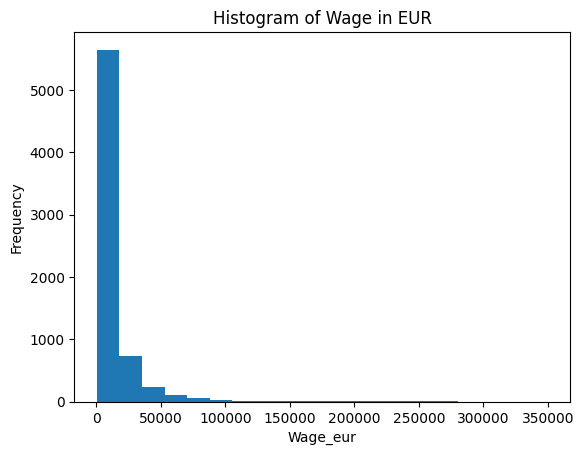

In [15]:
plt.hist(train_data['wage_eur'], bins=20)
plt.xlabel('Wage_eur')
plt.ylabel('Frequency')
plt.title('Histogram of Wage in EUR')
plt.show()


We apply logarithm to wages so they are not skewed and more evenly distributed

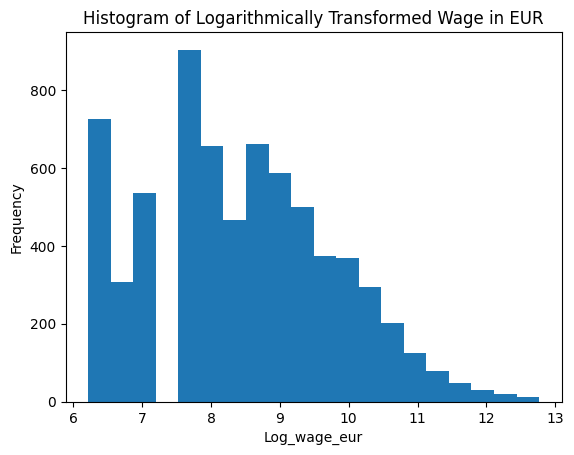

In [16]:
train_data['log_wage'] = np.log(train_data['wage_eur'])
train_data.drop(columns='wage_eur', inplace=True)
test_data['log_wage'] = np.log(test_data['wage_eur'])
test_data.drop(columns='wage_eur', inplace=True)
plt.hist(train_data['log_wage'], bins=20)
plt.xlabel('Log_wage_eur')
plt.ylabel('Frequency')
plt.title('Histogram of Logarithmically Transformed Wage in EUR')
plt.show()

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


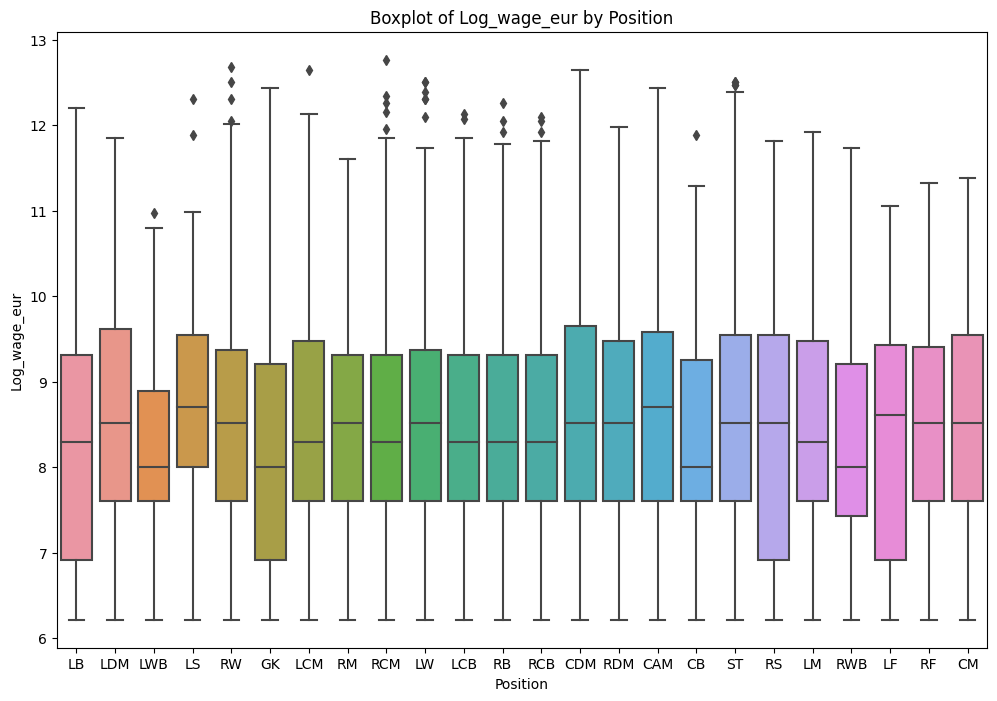

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_data, x='position', y='log_wage')
plt.title('Boxplot of Log_wage_eur by Position')
plt.xlabel('Position')
plt.ylabel('Log_wage_eur')
plt.show()

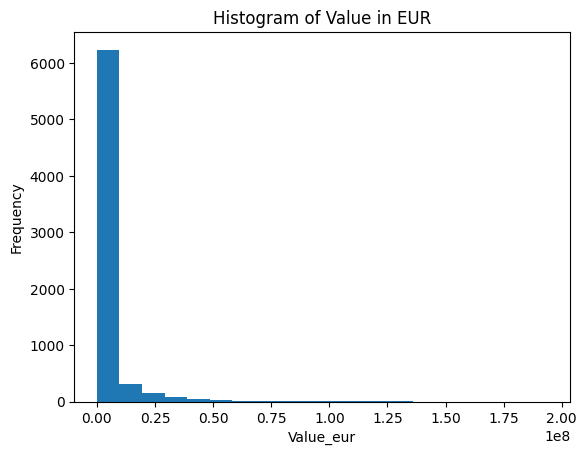

In [18]:
plt.hist(train_data['value_eur'], bins=20)
plt.xlabel('Value_eur')
plt.ylabel('Frequency')
plt.title('Histogram of Value in EUR')
plt.show()

We apply logarithm to values so they are not skewed and more evenly distributed

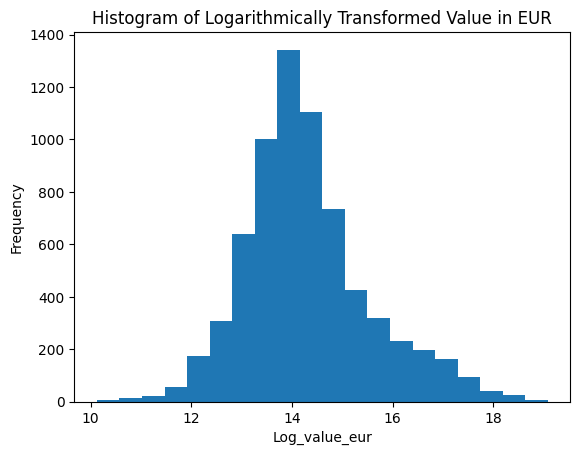

In [19]:
train_data['log_value'] = np.log(train_data['value_eur'])
train_data.drop(columns='value_eur', inplace=True)
test_data['log_value'] = np.log(test_data['value_eur'])
test_data.drop(columns='value_eur', inplace=True)
plt.hist(train_data['log_value'], bins=20)
plt.xlabel('Log_value_eur')
plt.ylabel('Frequency')
plt.title('Histogram of Logarithmically Transformed Value in EUR')
plt.show()

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


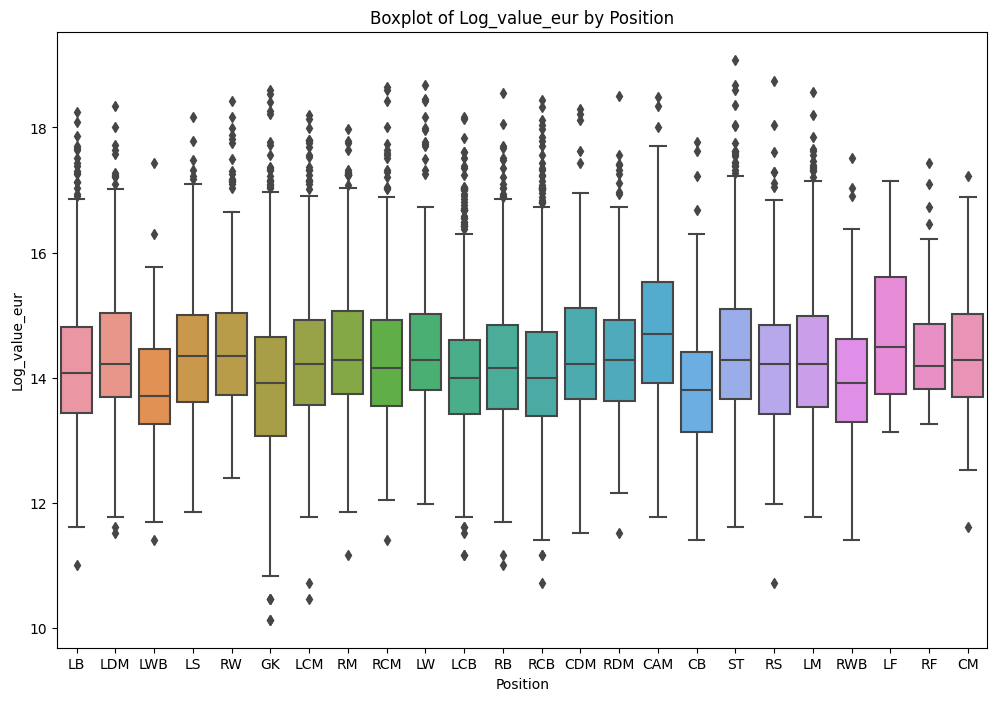

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_data, x='position', y='log_value')
plt.title('Boxplot of Log_value_eur by Position')
plt.xlabel('Position')
plt.ylabel('Log_value_eur')
plt.show()

Now we try to explore if there is some relationship between the position and some categorical features

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

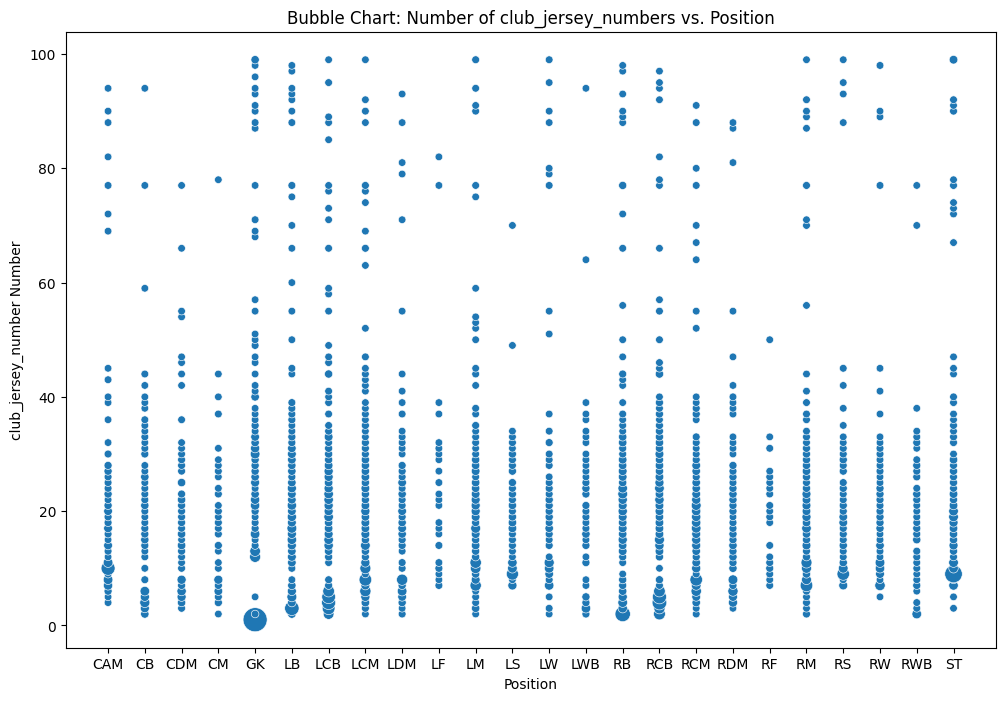

In [21]:
# Group by position and club_jersey_number, and count the occurrences
position_club_jersey_number_counts = train_data.groupby(['position', 'club_jersey_number']).size().reset_index(name='count')

# Create a bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(y='club_jersey_number', x='position', size='count', data=position_club_jersey_number_counts, sizes=(30, 300), legend=False)

# Set labels and title
plt.ylabel('club_jersey_number Number')
plt.xlabel('Position')
plt.title('Bubble Chart: Number of club_jersey_numbers vs. Position')

plt.show()

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

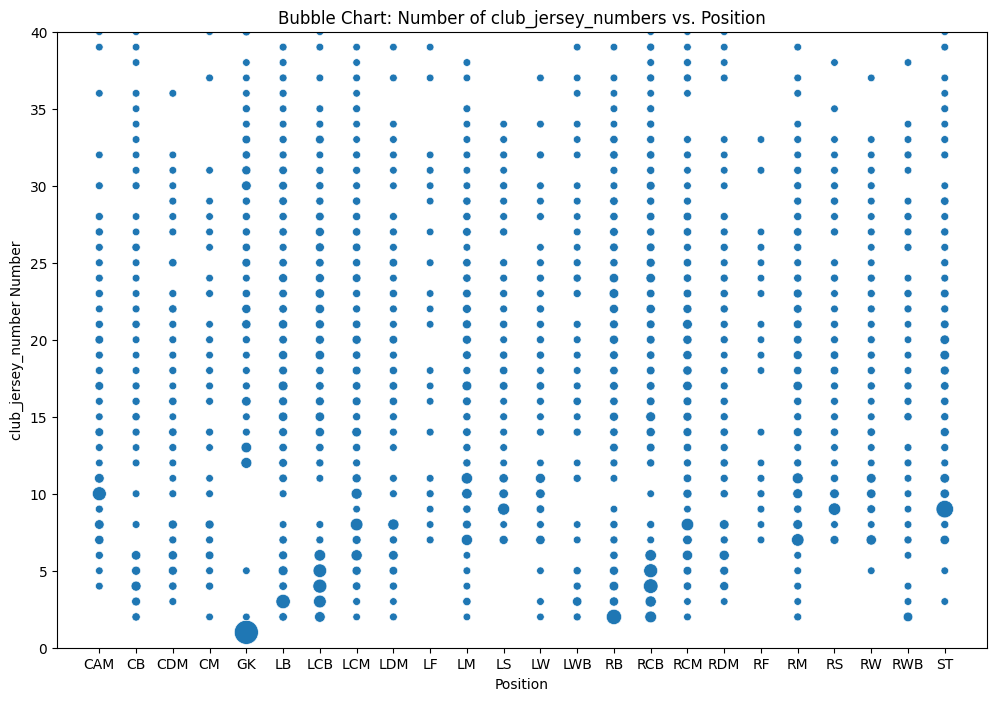

In [22]:
# Group by position and club_jersey_number, and count the occurrences
position_club_jersey_number_counts = train_data.groupby(['position', 'club_jersey_number']).size().reset_index(name='count')

# Create a bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(y='club_jersey_number', x='position', size='count', data=position_club_jersey_number_counts, sizes=(30, 300), legend=False)

# Set labels and title
plt.ylabel('club_jersey_number Number')
plt.xlabel('Position')
plt.title('Bubble Chart: Number of club_jersey_numbers vs. Position')
plt.ylim((0, 40))

plt.show()

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

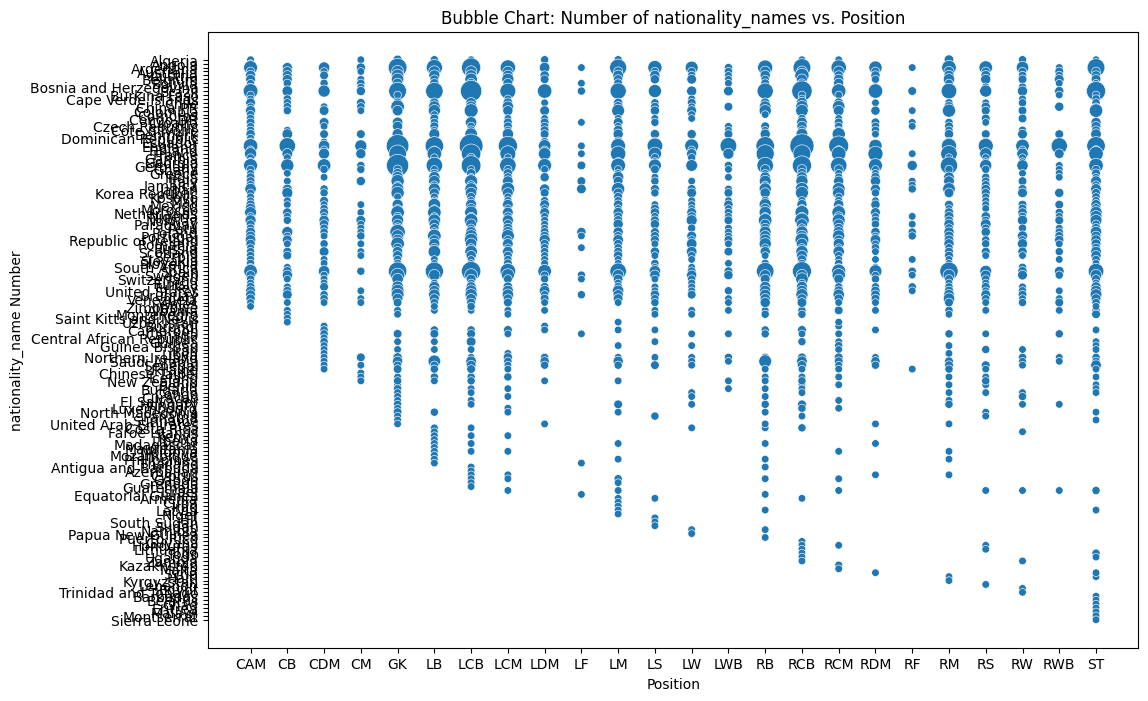

In [23]:
# Group by position and nationality_name, and count the occurrences
position_nationality_name_counts = train_data.groupby(['position', 'nationality_name']).size().reset_index(name='count')

# Create a bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(y='nationality_name', x='position', size='count', data=position_nationality_name_counts, sizes=(30, 300), legend=False)

# Set labels and title
plt.ylabel('nationality_name Number')
plt.xlabel('Position')
plt.title('Bubble Chart: Number of nationality_names vs. Position')

plt.show()

c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


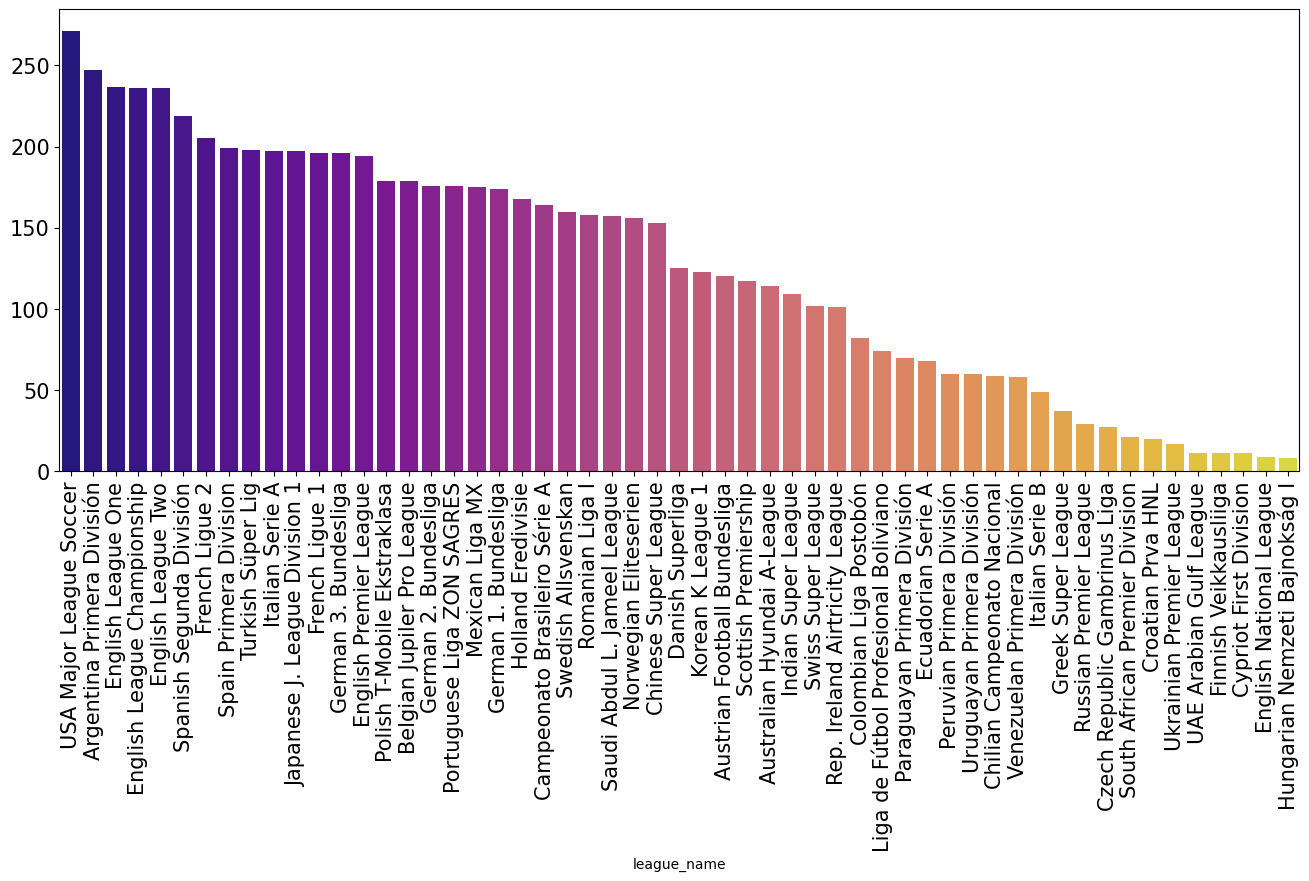

In [24]:
plt.figure(figsize=(16, 6))
sns.barplot(x=train_data['league_name'].value_counts().index, y=train_data['league_name'].value_counts().values,palette="plasma",capsize=.2)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.show()

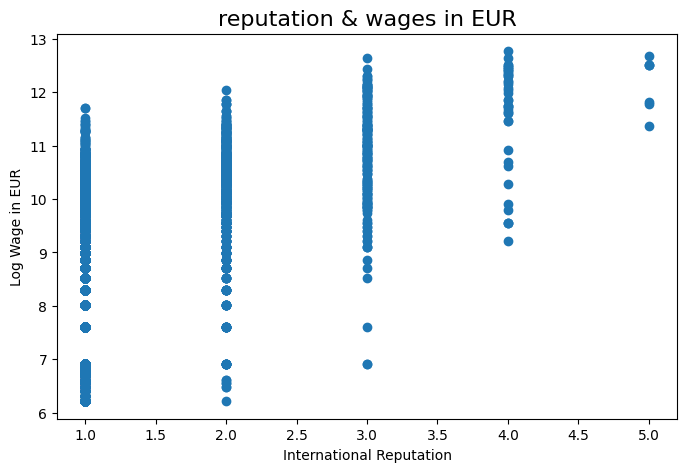

In [25]:
#Relationship between international_reputation  and wages

fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(data = train_data, x= 'international_reputation', y='log_wage')
plt.xlabel("International Reputation") 
plt.ylabel("Log Wage in EUR")
plt.title("reputation & wages in EUR", fontsize = 16)
plt.show()

<Axes: >

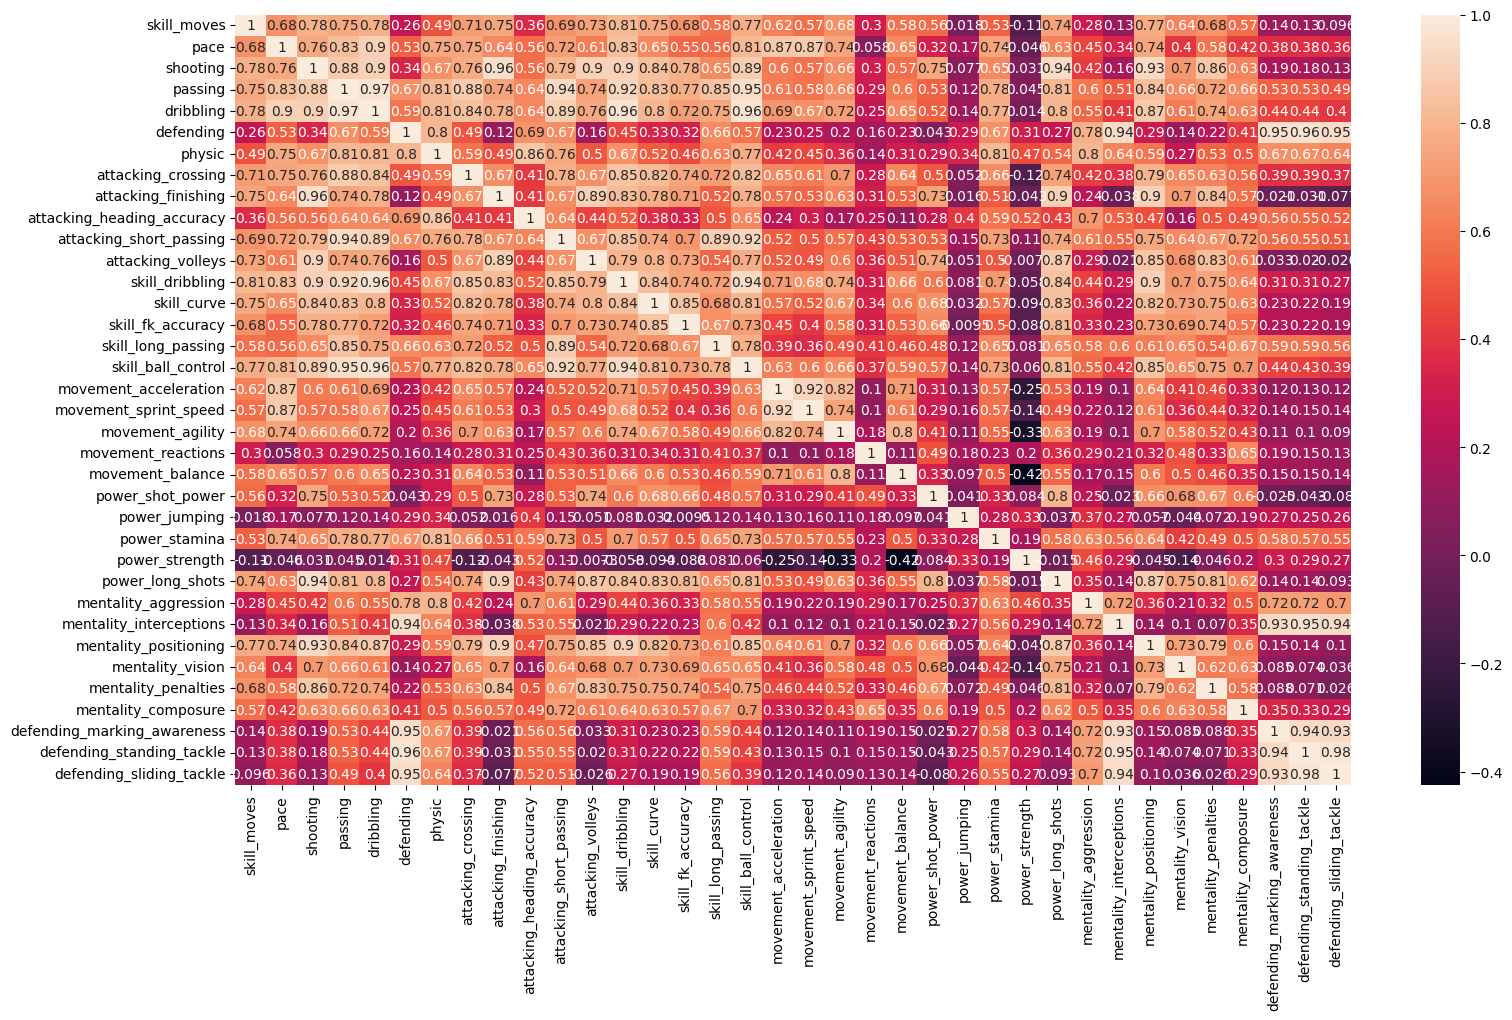

In [27]:
plt.figure(figsize=(18,10))

value_col = ['skill_moves', 'pace', 'shooting', 'passing', 'dribbling',
    'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
    'attacking_heading_accuracy', 'attacking_short_passing',
    'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power',
    'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions',
    'mentality_positioning', 'mentality_vision', 'mentality_penalties',
    'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle']

sns.heatmap(train_data[value_col].corr(), annot=True)

In [28]:
grouped_data = train_data[value_col + ['position']].groupby(by='position').agg('mean').reset_index()
grouped_data

,position,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,CAM,3.220532,71.593156,66.235741,68.574144,72.304183,47.136882,63.361217,64.608365,65.391635,53.262357,71.517110,60.216730,72.190114,66.410646,63.247148,66.942966,72.517110,72.779468,70.596958,75.866920,67.053232,74.319392,69.437262,62.167300,71.026616,62.087452,66.737643,57.186312,46.889734,68.136882,70.376426,62.486692,67.927757,45.980989,47.482890,43.441065
1,CB,2.035928,56.137725,37.574850,50.502994,52.299401,67.299401,73.976048,41.485030,32.718563,67.215569,60.485030,32.281437,46.778443,37.838323,35.059880,56.191617,56.682635,55.437126,56.718563,53.568862,63.329341,54.113772,50.437126,72.550898,67.508982,78.982036,36.305389,69.712575,66.167665,36.958084,44.784431,41.281437,60.269461,67.335329,68.305389,66.059880
2,CDM,2.463576,60.854305,55.602649,64.324503,65.781457,66.476821,71.913907,55.642384,51.225166,58.370861,70.695364,46.907285,63.774834,55.370861,51.741722,67.947020,68.245033,61.695364,60.152318,65.728477,67.092715,65.980132,64.854305,67.867550,76.417219,70.331126,58.437086,70.847682,67.801325,56.781457,64.337748,52.781457,66.986755,66.344371,68.622517,65.443709
3,CM,2.680000,63.533333,58.293333,66.160000,67.813333,63.080000,69.626667,60.200000,54.346667,55.226667,70.746667,50.853333,65.706667,60.080000,57.866667,67.973333,69.546667,64.200000,62.986667,70.400000,67.466667,71.733333,65.506667,68.520000,76.293333,67.386667,61.253333,67.306667,64.266667,61.133333,66.373333,57.213333,67.640000,63.360000,64.933333,61.413333
4,GK,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.602219,12.372425,14.497623,29.375594,12.703645,14.662441,15.670365,14.730586,28.342314,21.453249,40.209192,40.250396,41.752773,64.459588,43.353407,49.423138,59.706815,31.687797,62.148970,13.019017,27.540412,17.732171,11.611727,43.206022,20.591125,46.361331,15.708399,14.332805,14.237718
5,LB,2.509719,73.861771,48.349892,60.948164,65.071274,63.663067,67.110151,65.978402,44.064795,56.548596,64.377970,41.853132,63.896328,56.254860,48.030238,58.431965,64.691145,74.097192,73.676026,71.170626,63.954644,70.565875,57.114471,69.112311,74.377970,64.654428,48.714903,63.697624,63.993521,57.643629,55.993521,47.073434,60.915767,63.380130,65.693305,64.473002
6,LCB,2.057052,59.812995,38.797147,52.413629,54.646593,68.093502,73.622821,45.665610,33.491284,67.762282,62.091918,33.583201,49.790808,40.103011,36.817750,57.323296,58.711569,58.595880,60.795563,55.256735,64.052298,55.578447,52.022187,73.397781,67.825674,78.142631,37.500792,69.553090,67.342314,39.502377,45.451664,42.714739,61.470681,67.679873,69.294770,67.109350
7,LCM,2.716312,65.588652,59.316785,66.094563,68.172577,60.070922,67.416076,59.659574,56.364066,53.836879,70.725768,52.042553,66.917258,59.962175,56.061466,67.692671,69.392435,66.515366,64.806147,70.300236,66.411348,71.567376,65.891253,64.250591,74.420804,65.151300,61.231678,64.884161,61.808511,62.014184,67.153664,55.822695,65.933806,59.163121,62.189125,58.494090
8,LDM,2.577114,63.761194,57.024876,65.467662,67.134328,64.502488,70.925373,58.213930,52.711443,56.577114,71.079602,49.875622,65.383085,56.860697,54.597015,68.233831,69.114428,64.840796,62.820896,68.567164,67.084577,69.253731,65.656716,66.497512,76.552239,68.965174,59.850746,69.771144,66.313433,59.039801,65.671642,54.343284,66.393035,64.368159,66.343284,63.054726
9,LF,3.125000,75.718750,63.781250,65.093750,72.031250,38.781250,61.093750,62.718750,6

We explore all categorical values to check which ones are worth keeping in our model

In [29]:
# Identify all categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

# Display the list of categorical features
print("\nCategorical Features:")
print(categorical_features)


Categorical Features:
['short_name', 'club_name', 'league_name', 'nationality_name', 'preferred_foot', 'work_rate', 'real_face', 'player_traits', 'position']


In [30]:
for feature in categorical_features:
    unique_values_count = train_data[feature].nunique()
    print(f"Number of unique values in {feature}: {unique_values_count}")

Number of unique values in short_name: 6692
Number of unique values in club_name: 701
Number of unique values in league_name: 55
Number of unique values in nationality_name: 144
Number of unique values in preferred_foot: 2
Number of unique values in work_rate: 9
Number of unique values in real_face: 2
Number of unique values in player_traits: 772
Number of unique values in position: 24


Dropping some features either because they have too many different values or because they seem irrelevant

In [31]:
train_data.drop(columns=['short_name', 'club_name', 'league_name', 'nationality_name', 'real_face', 'club_jersey_number', 'player_traits','club_contract_valid_until', 'time_club','release_clause_eur','league_level'], inplace=True)
test_data.drop(columns=['short_name', 'club_name', 'league_name', 'nationality_name', 'real_face', 'club_jersey_number', 'player_traits', 'club_contract_valid_until', 'time_club','release_clause_eur','league_level'], inplace=True)
categorical_features = [col for col in categorical_features if col not in ['short_name', 'club_name', 'league_name', 'nationality_name', 'player_traits', 'position']]

Encoding of the remaining categorical features

In [32]:
foot_map = {'Right':0, 'Left':1}
train_data['preferred_foot'] = train_data['preferred_foot'].map({'Right': 0, 'Left': 1})
test_data['preferred_foot'] = test_data['preferred_foot'].map({'Right': 0, 'Left': 1})

In [33]:
# One hot encoding work_rate
encoded_wr1 = train_data['work_rate'].str.get_dummies().add_prefix('work_rate_')
encoded_wr2 = test_data['work_rate'].str.get_dummies().add_prefix('work_rate_')

train_data = pd.concat([train_data, encoded_wr1], axis = 1)
test_data = pd.concat([test_data, encoded_wr2], axis = 1)

train_data = train_data.drop(['work_rate'], axis=1)
test_data = test_data.drop(['work_rate'], axis=1)

train_data.head()

,id,overall,potential,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position,age,log_wage,log_value,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,216302,71,71,176,73,0,5,3,1,70.0,52.0,60.0,70.0,67.0,66.0,64,40,56,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,58,66,56,79,53,48,58,66,65,66,65,14,11,12,12,12,0.0,LB,33.95,9.210340,14.151983,0,0,0,0,0,0,1,0,0
1,237867,65,71,183,73,0,3,2,1,65.0,38.0,58.0,60.0,63.0,67.0,50,31,59,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,66,42,66,66,48,62,46,59,65,61,58,10,13,7,6,11,0.0,LDM,27.13,7.600902,13.815511,0,0,0,0,0,0,0,0,1
2,253472,65,77,178,69,1,3,3,1,79.0,35.0,58.0,66.0,59.0,64.0,59,30,53,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,61,28,69,62,58,60,31,65,60,58,59,10,10,8,10,11,0.0,LWB,22.20,7.600902,14.285514,0,0,1,0,0,0,0,0,0
3,223994,72,72,188,81,0,3,3,1,64.0,74.0,51.0,68.0,24.0,76.0,32,78,75,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,87,69,52,18,76,60,75,75,16,22,19,16,15,13,8,9,0.0,LS,31.79,8.517193,14.648420,0,0,1,0,0,0,0,0,0
4,251635,65,65,179,74,1,2,2,1,74.0,53.0,59.0,53.0,61.0,69.0,64,38,49,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,70,67,53,63,60,52,52,58,64,61,58,12,5,11,12,15,0.0,LB,33.50,8.006368,13.171154,0,0,0,0,0,0,1,0,0


Lets impute missing values separating each data for different positions to fill them

In [34]:
train_data.isna().sum().sort_values(ascending=False)

log_value                      2
id                             0
goalkeeping_positioning        0
power_long_shots               0
mentality_aggression           0
mentality_interceptions        0
mentality_positioning          0
mentality_vision               0
mentality_penalties            0
mentality_composure            0
defending_marking_awareness    0
defending_standing_tackle      0
defending_sliding_tackle       0
goalkeeping_diving             0
goalkeeping_handling           0
goalkeeping_kicking            0
goalkeeping_reflexes           0
power_stamina                  0
goalkeeping_speed              0
position                       0
age                            0
log_wage                       0
work_rate_High/High            0
work_rate_High/Low             0
work_rate_High/Medium          0
work_rate_Low/High             0
work_rate_Low/Low              0
work_rate_Low/Medium           0
work_rate_Medium/High          0
work_rate_Medium/Low           0
power_stre

In [35]:
from sklearn.impute import KNNImputer

imputed_train_data = pd.DataFrame()
for position in train_data['position'].unique():
    position_data = train_data[train_data['position'] == position].copy()
    # Apply KNN imputation
    numeric_columns = position_data.select_dtypes(include='number').columns
    numeric_columns = numeric_columns[position_data[numeric_columns].notnull().any()]

    imputer = KNNImputer(n_neighbors=5)
    imputed_data = imputer.fit_transform(position_data[numeric_columns])
    imputed_df = pd.DataFrame(imputed_data, columns=numeric_columns, index=position_data.index)

    # Update the original dataset with imputed values
    position_data[numeric_columns] = imputed_df

    # Step 3: Join the imputed datasets back together
    imputed_train_data = pd.concat([imputed_train_data, position_data], ignore_index=True)

train_data = imputed_train_data

# Apply KNN imputation
test_data['goalkeeping_speed'] = np.where(test_data['goalkeeping_speed'].isna(), 0, test_data['goalkeeping_speed'])
numeric_columns = test_data.select_dtypes(include='number').columns
numeric_columns = numeric_columns[test_data[numeric_columns].notnull().any()]

imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(test_data[numeric_columns])
imputed_df = pd.DataFrame(imputed_data, columns=numeric_columns, index=test_data.index)

# Update the original dataset with imputed values
test_data[numeric_columns] = imputed_df

# Display the imputed_train_data
print('Missing values in train_data: ' + str(train_data.isna().sum().sum()))
print('Missing values in test_data: ' + str(test_data.isna().sum().sum()))


Missing values in train_data: 0
Missing values in test_data: 0


Encode positions

In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'category' column
train_data['position'] = label_encoder.fit_transform(train_data['position'])
train_data.head()

,id,overall,potential,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position,age,log_wage,log_value,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,216302.0,71.0,71.0,176.0,73.0,0.0,5.0,3.0,1.0,70.0,52.0,60.0,70.0,67.0,66.0,64.0,40.0,56.0,65.0,41.0,68.0,64.0,58.0,58.0,68.0,71.0,70.0,87.0,61.0,86.0,67.0,77.0,86.0,58.0,66.0,56.0,79.0,53.0,48.0,58.0,66.0,65.0,66.0,65.0,14.0,11.0,12.0,12.0,12.0,0.0,5,33.95,9.210340,14.151983,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,251635.0,65.0,65.0,179.0,74.0,1.0,2.0,2.0,1.0,74.0,53.0,59.0,53.0,61.0,69.0,64.0,38.0,49.0,63.0,46.0,43.0,53.0,58.0,55.0,56.0,71.0,76.0,70.0,60.0,71.0,72.0,80.0,78.0,70.0,67.0,53.0,63.0,60.0,52.0,52.0,58.0,64.0,61.0,58.0,12.0,5.0,11.0,12.0,15.0,0.0,5,33.50,8.006368,13.171154,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,257728.0,62.0,62.0,176.0,73.0,1.0,2.0,2.0,1.0,66.0,41.0,63.0,48.0,59.0,62.0,67.0,28.0,40.0,66.0,45.0,41.0,71.0,66.0,62.0,47.0,66.0,66.0,67.0,58.0,67.0,64.0,56.0,55.0,69.0,43.0,53.0,60.0,52.0,53.0,34.0,56.0,61.0,63.0,60.0,13.0,11.0,6.0,5.0,6.0,0.0,5,37.02,6.907755,11.918391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,260383.0,56.0,68.0,191.0,82.0,0.0,3.0,2.0,1.0,63.0,31.0,42.0,48.0,54.0,63.0,40.0,29.0,52.0,48.0,27.0,48.0,27.0,29.0,42.0,46.0,64.0,62.0,59.0,53.0,48.0,36.0,63.0,62.0,67.0,28.0,54.0,56.0,41.0,38.0,39.0,37.0,48.0,59.0,56.0,12.0,8.0,6.0,8.0,6.0,0.0,5,22.21,6.214608,12.691580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,246870.0,73.0,78.0,175.0,74.0,1.0,2.0,2.0,1.0,71.0,48.0,68.0,71.0,71.0,74.0,69.0,38.0,63.0,71.0,49.0,71.0,49.0,36.0,67.0,70.0,69.0,73.0,73.0,71.0,72.0,63.0,69.0,77.0,71.0,52.0,79.0,69.0,71.0,73.0,47.0,73.0,69.0,77.0,73.0,10.0,14.0,12.0,7.0,15.0,0.0,5,28.01,9.305651,15.250595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Checking if all categorical features have been treated

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6895 entries, 0 to 6894
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6895 non-null   float64
 1   overall                      6895 non-null   float64
 2   potential                    6895 non-null   float64
 3   height_cm                    6895 non-null   float64
 4   weight_kg                    6895 non-null   float64
 5   preferred_foot               6895 non-null   float64
 6   weak_foot                    6895 non-null   float64
 7   skill_moves                  6895 non-null   float64
 8   international_reputation     6895 non-null   float64
 9   pace                         6895 non-null   float64
 10  shooting                     6895 non-null   float64
 11  passing                      6895 non-null   float64
 12  dribbling                    6895 non-null   float64
 13  defending         

Dimensionaility reduction using PCA

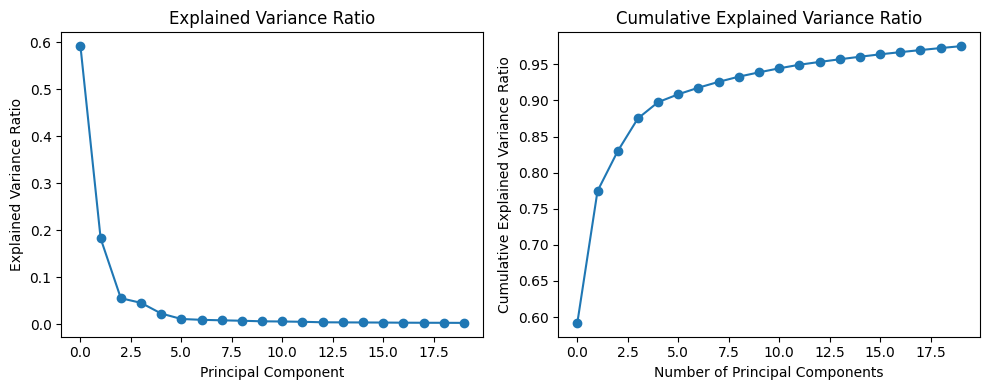

Optimal Number of Components: 4


In [38]:
from sklearn.decomposition import PCA

X = train_data[train_data.columns.drop(['id', 'position'])]
y = train_data['position']

# With PCA
# Calculate PCA
n_components = 20  # You can adjust the number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Step 5: With PCA - Calculate PCA Importance and Optimal Number of Components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio and cumulative explained variance ratio
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.tight_layout()
plt.show()

# Looking at the data, we select optimal clusters = 4
optimal_num_components  = 4

# Find the optimal number of components where cumulative explained variance is sufficient
print(f'Optimal Number of Components: {optimal_num_components}')

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, make_scorer, f1_score

# Define the F1 scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Train Random Forest using Cross-Validation
rf_classifier = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring=f1_scorer)
avg_cv_accuracy = np.mean(cv_scores)

# Print accuracy and confusion matrix
y_pred_rf = cross_val_predict(rf_classifier, X, y, cv=5)
conf_matrix_rf = confusion_matrix(y, y_pred_rf)

print(f'Without PCA - Average Accuracy: {avg_cv_accuracy:.2f}')

# Step 6: With PCA - Train Random Forest using Cross-Validation
pca_classifier = RandomForestClassifier(random_state=42)
cv_scores_pca = cross_val_score(pca_classifier, X_pca[:, :n_components], y, cv=5, scoring=f1_scorer)
avg_cv_f1_pca = np.mean(cv_scores_pca)

# Print accuracy and confusion matrix
y_pred_pca = cross_val_predict(pca_classifier, X_pca[:, :n_components], y, cv=5)
conf_matrix_pca = confusion_matrix(y, y_pred_pca)

print(f'With PCA - Average F1-Score: {avg_cv_f1_pca:.2f}')

Without PCA - Average Accuracy: 0.39
With PCA - Average F1-Score: 0.33


We see that with PCA the model drop a significant amount in it's F1-Score, and since the amount of data is not huge we don't worry about speed or resources

Prepare data for model

In [40]:
from sklearn.preprocessing import StandardScaler

predicted_var = ['position']
feature_var = train_data.loc[:, ~train_data.columns.isin(predicted_var)].columns.drop(['id'])

# Standardize all features
scaler = StandardScaler()
train_data[feature_var] = scaler.fit_transform(train_data[feature_var])
test_data[feature_var] = scaler.fit_transform(test_data[feature_var])

train_data.head()


,id,overall,potential,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position,age,log_wage,log_value,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,216302.0,0.365432,-0.169893,-0.798419,-0.359048,-0.568921,2.901008,0.701682,-0.313809,0.340433,0.128253,0.277122,0.549003,0.756181,0.185652,0.623435,-0.420111,0.056447,0.200968,-0.210520,0.537470,0.740170,0.713922,0.085445,0.404528,0.350615,0.278542,1.496684,-0.505233,1.486062,0.495301,0.798919,1.199396,-0.858775,0.837127,-0.231511,1.371699,-0.006699,-0.655685,0.518231,0.377093,0.698032,0.658030,0.740508,-0.108730,-0.279991,-0.218117,-0.222581,-0.224222,-0.306695,5,0.977807,0.582089,-0.113564,-0.290034,-0.21291,-0.517394,-0.171499,-0.043462,-0.158032,2.656107,-0.192349,-0.910446
1,251635.0,-0.642967,-1.158288,-0.361240,-0.217015,1.757715,-1.454610,-0.581633,-0.313809,0.516438,0.176302,0.226074,-0.274094,0.481767,0.326427,0.623435,-0.522208,-0.357470,0.050629,0.068998,-0.857976,0.140774,0.713922,-0.126452,-0.374547,0.350615,0.693168,0.323112,-0.631340,0.432238,0.876868,1.044880,0.669478,0.155355,0.888945,-0.416158,0.574126,0.355766,-0.361357,0.135148,-0.354416,0.647149,0.418763,0.400897,-0.223345,-0.638172,-0.279409,-0.222581,-0.056183,-0.306695,5,0.873600,-0.287217,-0.902340,-0.290034,-0.21291,-0.517394,-0.171499,-0.043462,-0.158032,2.656107,-0.192349,-0.910446
2,257728.0,-1.147166,-1.652485,-0.798419,-0.359048,1.757715,-1.454610,-0.581633,-0.313809,0.164429,-0.400292,0.430264,-0.516182,0.390295,-0.002049,0.791785,-1.032697,-0.889649,0.276138,0.013094,-0.969611,1.121603,1.162466,0.367974,-0.958854,0.007533,0.002125,0.116011,-0.883555,0.151219,0.266361,-0.922809,-0.854037,0.070844,-0.354684,-0.416158,0.424582,-0.058479,-0.287775,-1.014098,-0.537293,0.494500,0.514470,0.497929,-0.166038,-0.279991,-0.585867,-0.630544,-0.560298,-0.306695,5,1.688736,-1.080450,-1.909802,-0.290034,-0.21291,-0.517394,-0.171499,-0.043462,-0.158032,-0.376491,-0.192349,1.098362
3,260383.0,-2.155565,-0.664090,1.387474,0.919250,-0.568921,-0.002737,-0.581633,-0.313809,0.032425,-0.880787,-0.641731,-0.516182,0.161617,0.044877,-0.723363,-0.981648,-0.180077,-1.076913,-0.993171,-0.578886,-1.275978,-0.912051,-1.044672,-1.023776,-0.129699,-0.274293,-0.436259,-1.514090,-1.183624,-1.870415,-0.348900,-0.390358,-0.098177,-1.131951,-0.354609,0.225188,-0.628067,-1.391504,-0.694863,-2.274628,-0.166981,0.323057,0.303866,-0.223345,-0.459081,-0.585867,-0.455703,-0.560298,-0.306695,5,-1.740859,-1.580923,-1.288009,-0.290034,-0.21291,-0.517394,-0.171499,-0.043462,-0.158032,-0.376491,-0.192349,1.098362
4,246870.0,0.701565,0.983234,-0.944145,-0.217015,1.757715,-1.454610,-0.581633,-0.313809,0.384435,-0.063945,0.685500,0.597420,0.939123,0.561052,0.904018,-0.522208,0.470363,0.651985,0.236709,0.704924,-0.077188,-0.519575,0.721136,0.534373,0.213382,0.485855,0.530213,0.755838,0.502493,0.190048,0.143022,0.603238,0.239866,0.111677,1.184114,0.873216,0.925353,1.183863,-0.184087,1.017164,0.901565,1.184416,1.128634,-0.337960,-0.100900,-0.218117,-0.513983,-0.056183,-0.306695,5,-0.397736,0.650906,0.769932,-0.290034,-0.21291,-0.517394,-0.171499,-0.04

We ran the model with RandomForest, XGBoost and LightGBM to compare performance

RandomForest Accuracy: 0.45612762871646123
RandomForest F1 Score: 0.40512908120822805
XGBoost Accuracy: 0.4263959390862944
XGBoost F1 Score: 0.4014209116883353
LightGBM Accuracy: 0.444525018129079
LightGBM F1 Score: 0.40940712048608624


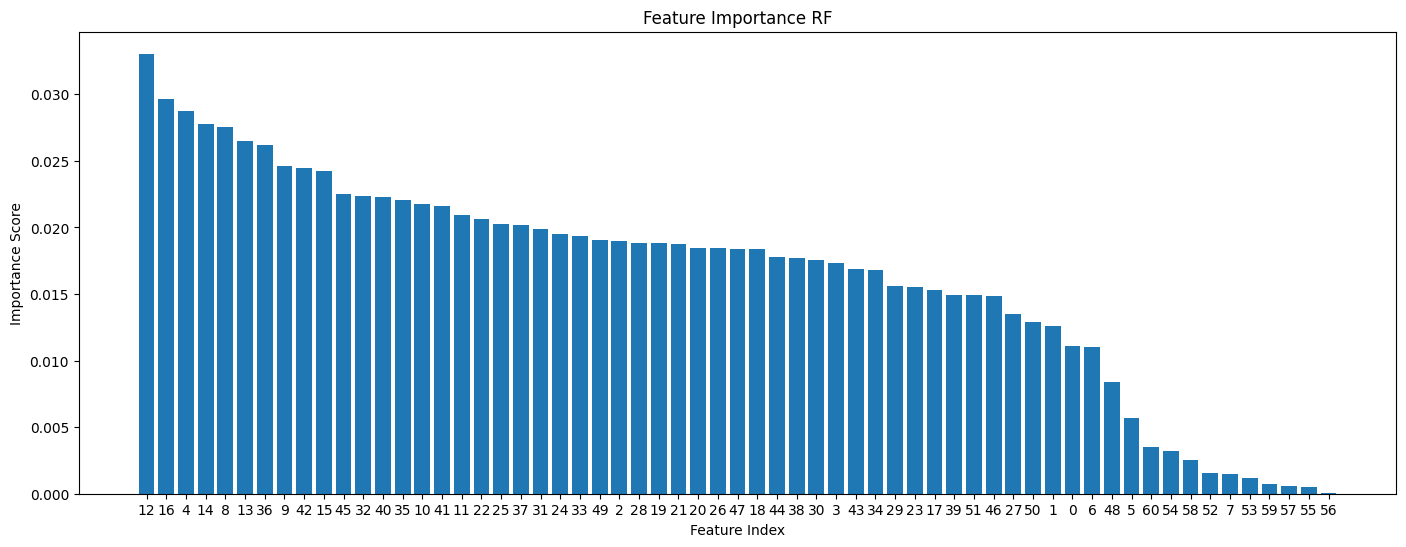

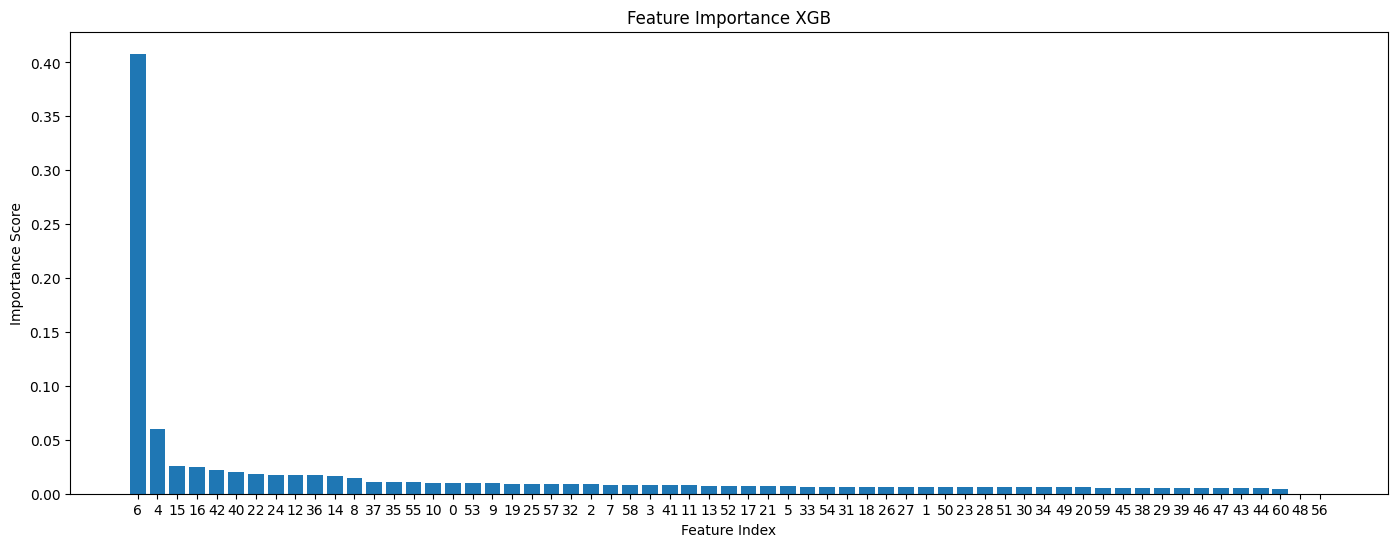

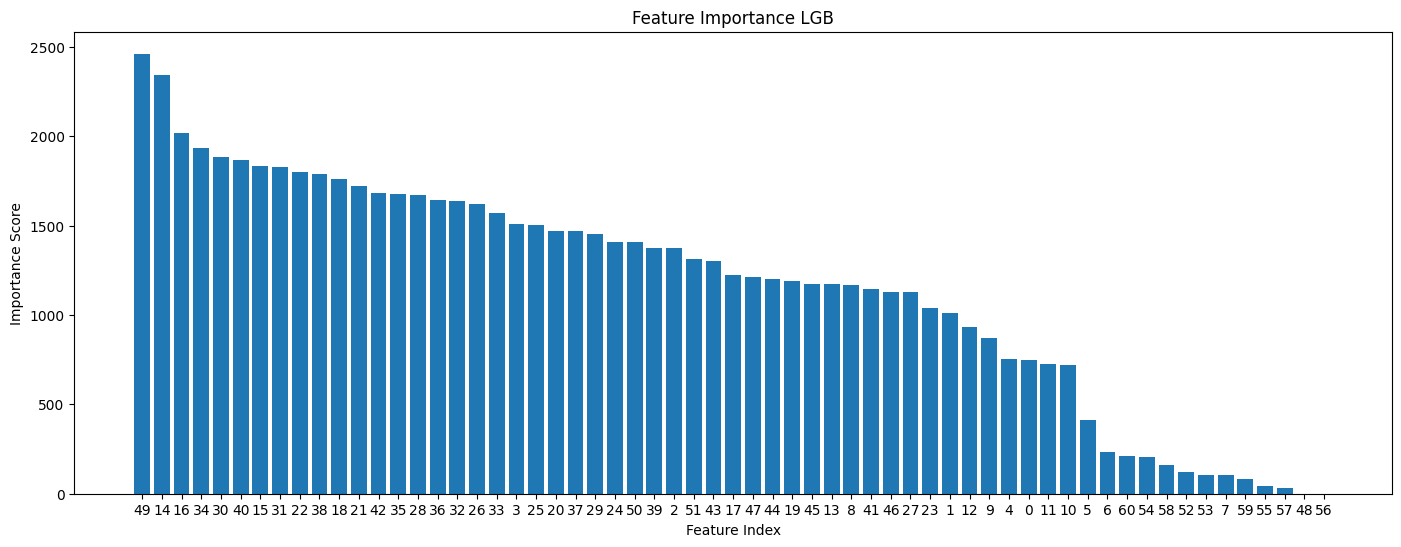

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

X, y = train_data[feature_var], train_data['position']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

# Initialize a random forest classifier
rf_classifier = RandomForestClassifier()

# Train the random forest model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("RandomForest Accuracy:", accuracy_rf)
print("RandomForest F1 Score:", f1_rf)

# XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost F1 Score:", f1_xgb)

# LightGBM
lgb_classifier = LGBMClassifier(verbose=-1)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test, verbose=-100)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')
print("LightGBM Accuracy:", accuracy_lgb)
print("LightGBM F1 Score:", f1_lgb)

# Visualize feature importance
feature_importances_rf = rf_classifier.feature_importances_
indices = np.argsort(feature_importances_rf)[::-1]

plt.figure(figsize=(17, 6))
plt.title("Feature Importance RF")
plt.bar(range(X.shape[1]), feature_importances_rf[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()

# Visualize feature importance
feature_importances_xgb = xgb_classifier.feature_importances_
indices = np.argsort(feature_importances_xgb)[::-1]

plt.figure(figsize=(17, 6))
plt.title("Feature Importance XGB")
plt.bar(range(X.shape[1]), feature_importances_xgb[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()

# Visualize feature importance
feature_importances_lgb = lgb_classifier.feature_importances_
indices = np.argsort(feature_importances_lgb)[::-1]

plt.figure(figsize=(17, 6))
plt.title("Feature Importance LGB")
plt.bar(range(X.shape[1]), feature_importances_lgb[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()


Lets's do some cross validation to check which model has a better f1-score

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import warnings

# Suppress FutureWarnings related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# Define the F1 scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Use cross_val_score for cross-validated f1
rf_f1_cv_scores = cross_val_score(rf_classifier, X, y, cv=10, scoring=f1_scorer)
xgb_f1_cv_scores = cross_val_score(xgb_classifier, X, y, cv=10, scoring=f1_scorer)
lgb_f1_cv_scores = cross_val_score(lgb_classifier, X, y, cv=10, scoring=f1_scorer)

print("f1 for Random Forest Classifier model without cross-validation:", f1_rf)
print("f1 for XGB Classifier model with 10 fold cross validation: ", f1_xgb)
print("f1 for LightGBM Classifier model with 10 fold cross validation: ", f1_lgb)

print("Cross-validated for Random Forest Classifier model f1 scores:", rf_f1_cv_scores)
print("Mean f1 for Random Forest Classifier model with cross-validation:", np.mean(rf_f1_cv_scores))
print("Cross-validated for XGB Classifier model f1 scores:", xgb_f1_cv_scores)
print("Mean f1 for XGB Classifier model with cross-validation:", np.mean(xgb_f1_cv_scores))
print("Cross-validated for LightGBM Classifier model f1 scores:", lgb_f1_cv_scores)
print("Mean f1 for LightGBM Classifier model with cross-validation:", np.mean(lgb_f1_cv_scores))

f1 for Random Forest Classifier model without cross-validation: 0.40512908120822805
f1 for XGB Classifier model with 10 fold cross validation:  0.4014209116883353
f1 for LightGBM Classifier model with 10 fold cross validation:  0.40940712048608624
Cross-validated for Random Forest Classifier model f1 scores: [0.39088605 0.37880438 0.41838521 0.39883391 0.40171322 0.40388909
 0.41433438 0.38669698 0.4186886  0.38972283]
Mean f1 for Random Forest Classifier model with cross-validation: 0.40019546530542704
Cross-validated for XGB Classifier model f1 scores: [0.38434493 0.38214537 0.40344145 0.39434804 0.39555293 0.40714264
 0.4056251  0.40718562 0.41007616 0.3845894 ]
Mean f1 for XGB Classifier model with cross-validation: 0.39744516380576894
Cross-validated for LightGBM Classifier model f1 scores: [0.37915555 0.38090692 0.39194052 0.37555199 0.39920873 0.40399651
 0.38489572 0.40811279 0.41694728 0.38140054]
Mean f1 for LightGBM Classifier model with cross-validation: 0.39221165449358764

We use sampling to help with the imbalance of our dataset

In [78]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Create a dictionary to store results
results = {}

# Model 1: Without applying any sampling techniques
results['No Sampling RF'] = {
    'Accuracy': accuracy_rf,
    'F1-Score': f1_rf
}
results['No Sampling LGB'] = {
    'Accuracy': accuracy_lgb,
    'F1-Score': f1_lgb
}

# Model 2: Using random under-sampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=28)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
rf_model2 = RandomForestClassifier()
rf_model2.fit(X_train_resampled, y_train_resampled)
y_pred2_rf = rf_model2.predict(X_test)
results['Random Under-sampling RF'] = {
    'Accuracy': accuracy_score(y_test, y_pred2_rf),
    'F1-Score': f1_score(y_test, y_pred2_rf, average='weighted')
}
lgb_model2 = LGBMClassifier(verbose=-1)
lgb_model2.fit(X_train_resampled, y_train_resampled)
y_pred2_lgb = lgb_model2.predict(X_test, verbose=-100)
results['Random Under-sampling LGB'] = {
    'Accuracy': accuracy_score(y_test, y_pred2_lgb),
    'F1-Score': f1_score(y_test, y_pred2_lgb, average='weighted')
}

# Model 3: Using random over-sampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=28)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
rf_model3 = RandomForestClassifier()
rf_model3.fit(X_train_resampled, y_train_resampled)
y_pred3_rf = rf_model3.predict(X_test)
results['Random Over-sampling RF'] = {
    'Accuracy': accuracy_score(y_test, y_pred3_rf),
    'F1-Score': f1_score(y_test, y_pred3_rf, average='weighted')
}
lgb_model3 = LGBMClassifier(verbose=-1)
lgb_model3.fit(X_train_resampled, y_train_resampled)
y_pred3_lgb = lgb_model3.predict(X_test, verbose=-100)
results['Random Over-sampling LGB'] = {
    'Accuracy': accuracy_score(y_test, y_pred3_lgb),
    'F1-Score': f1_score(y_test, y_pred3_lgb, average='weighted')
}

# Model 4: Using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=28)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
rf_model4 = RandomForestClassifier()
rf_model4.fit(X_train_resampled, y_train_resampled)
y_pred4_rf = rf_model4.predict(X_test)
results['SMOTE RF'] = {
    'Accuracy': accuracy_score(y_test, y_pred4_rf),
    'F1-Score': f1_score(y_test, y_pred4_rf, average='weighted')
}
lgb_model4 = LGBMClassifier(verbose=-1)
lgb_model4.fit(X_train_resampled, y_train_resampled)
y_pred4_lgb = lgb_model4.predict(X_test, verbose=-100)
results['SMOTE LGB'] = {
    'Accuracy': accuracy_score(y_test, y_pred4_lgb),
    'F1-Score': f1_score(y_test, y_pred4_lgb, average='weighted')
}

# Display results
for method, metrics in results.items():
    print(f"Sampling Method: {method}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"F1-Score: {metrics['F1-Score']:.2f}")
    print()

Sampling Method: No Sampling RF
Accuracy: 0.46
F1-Score: 0.41

Sampling Method: No Sampling LGB
Accuracy: 0.44
F1-Score: 0.41

Sampling Method: Random Under-sampling RF
Accuracy: 0.34
F1-Score: 0.35

Sampling Method: Random Under-sampling LGB
Accuracy: 0.32
F1-Score: 0.33

Sampling Method: Random Over-sampling RF
Accuracy: 0.45
F1-Score: 0.41

Sampling Method: Random Over-sampling LGB
Accuracy: 0.44
F1-Score: 0.41

Sampling Method: SMOTE RF
Accuracy: 0.42
F1-Score: 0.40

Sampling Method: SMOTE LGB
Accuracy: 0.42
F1-Score: 0.41



We get the best F1-Score with Random Forest when using Over Sampling

In [80]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=28)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

rf_model4 = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf)
rf_model4.fit(X_train_resampled, y_train_resampled)
y_pred4_rf = rf_model4.predict(X_test)
score = f1_score(y_test, y_pred4_rf, average='weighted')
score

0.4153277360095665

In [75]:
## GRID SEARCH

ros = RandomOverSampler(sampling_strategy='auto', random_state=28)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Define the hyperparameter grid for grid search
n_estimators = [100, 200, 300]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_depth = [None, 10, 20]

best_score = 0

for i in n_estimators:
    for j in max_depth:
        for k in min_samples_split:
            for l in min_samples_leaf:
                rf_model4 = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, min_samples_leaf=l)
                rf_model4.fit(X_train_resampled, y_train_resampled)
                y_pred4_rf = rf_model4.predict(X_test)
                score = f1_score(y_test, y_pred4_rf, average='weighted')
                if score > best_score:
                    best_score = score
                    best_n_estimators = i
                    best_max_depth = j
                    best_min_samples_split = k
                    best_min_samples_leaf = l

print(f'Best F1-Score with grid search:{best_score}')
print(f'Best n_estimators with grid search:{best_n_estimators}')
print(f'Best max_depth with grid search:{best_max_depth}')
print(f'Best min_samples_split with grid search:{best_min_samples_split}')
print(f'Best min_samples_leaf with grid search:{best_min_samples_leaf}')

Best F1-Score with grid search:0.41900920200574976
Best n_estimators with grid search:200
Best max_depth with grid search:None
Best min_samples_split with grid search:10
Best min_samples_leaf with grid search:1


From both searches we got the same result

Random Forest Accuracy (All Features): 0.45612762871646123
Random Forest F1 Score (All Features): 0.4195675583297817


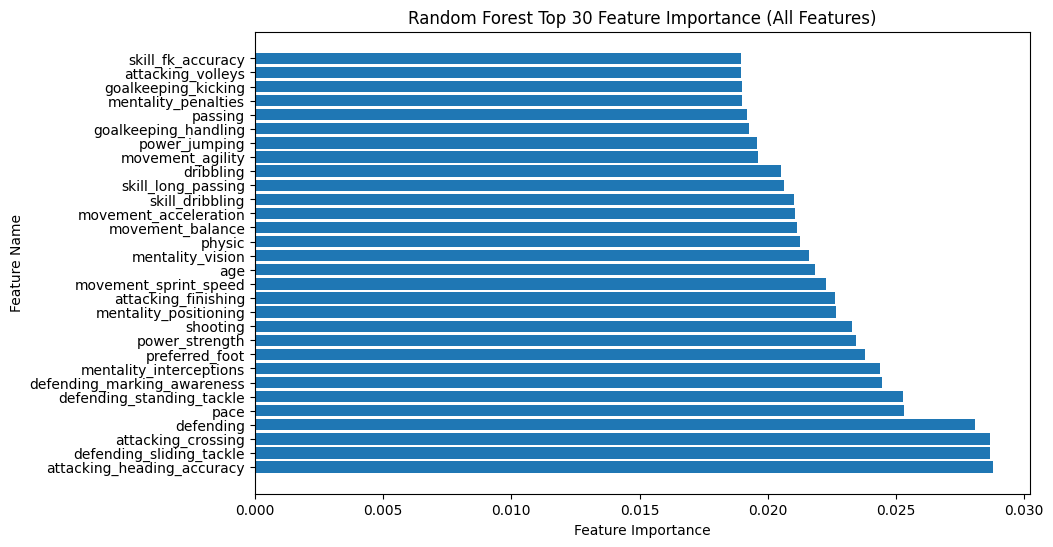

In [89]:
# Train the model on all features using RandomForestClassifier
rf_classifier_all = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, random_state=28)
rf_classifier_all.fit(X_train_resampled, y_train_resampled)
y_pred_rf_all = rf_classifier_all.predict(X_test)

# Calculate metrics for the model with all features
accuracy_rf_all = accuracy_score(y_test, y_pred_rf_all)
f1_rf_all = f1_score(y_test, y_pred_rf_all, average='weighted')
print("Random Forest Accuracy (All Features):", accuracy_rf_all)
print("Random Forest F1 Score (All Features):", f1_rf_all)

# Get feature importances and their names
feature_importances_all = rf_classifier_all.feature_importances_
feature_names_all = X.columns

# Sort features by importance
sorted_indices_all = feature_importances_all.argsort()[::-1]
sorted_feature_importances_all = feature_importances_all[sorted_indices_all]
sorted_feature_names_all = [feature_names_all[i] for i in sorted_indices_all]

# Visualize the top 30 features and their importances
plt.figure(figsize=(10, 6))
plt.barh(range(30), sorted_feature_importances_all[:30])
plt.yticks(range(30), sorted_feature_names_all[:30])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Top 30 Feature Importance (All Features)")
plt.show()


Finally we use the Random Forest model using Over Sampling to predict the positions in the test file

In [47]:
test_data['position'] = rf_classifier_all.predict(test_data)

In [48]:
test_data['position'] = label_encoder.inverse_transform(test_data['position'])
test_data['position'].head()

0    LB
1    CB
2    ST
3    RM
4    RB
Name: position, dtype: object

We also tried doing the model with logistic regression checking the probability of each position for each player

In [49]:
X_train_resampled['position'] = y_train_resampled
X_train_resampled['position'] = label_encoder.inverse_transform(X_train_resampled['position'])
encoded_wr1 = X_train_resampled['position'].str.get_dummies().add_prefix('position_')
X_train_resampled = pd.concat([X_train_resampled, encoded_wr1], axis = 1)
X_train_resampled = X_train_resampled.drop(['position'], axis=1)

X_train_resampled.head()

,overall,potential,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,...,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,age,log_wage,log_value,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,position_CAM,position_CB,position_CDM,position_CM,position_GK,position_LB,position_LCB,position_LCM,position_LDM,position_LF,position_LM,position_LS,position_LW,position_LWB,position_RB,position_RCB,position_RCM,position_RDM,position_RF,position_RM,position_RS,position_RW,position_RWB,position_ST
0,3.222562,3.454221,1.824652,2.623648,1.757715,-0.002737,0.701682,5.994384,1.176456,2.002185,0.532358,1.033178,-0.250004,1.218003,-0.330547,2.336526,0.825149,1.103002,2.416950,1.095649,1.448546,0.938194,-0.408981,1.508217,1.105394,1.937046,0.668280,2.899659,0.502493,2.555764,0.552958,0.934437,2.099105,1.925302,1.553407,-0.422839,1.857406,1.036700,1.667477,2.022990,...,-0.156825,-0.280862,-0.504285,-0.306695,-1.469918,2.313444,3.575390,3.447876,-0.212910,-0.517394,-0.171499,-0.043462,-0.158032,-0.376491,-0.192349,-0.910446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.029299,-0.499358,-0.215514,0.067051,-0.568921,-0.002737,0.701682,-0.313809,0.120427,0.993145,-0.539636,0.403750,-1.164717,-0.095899,-1.003946,1.315549,1.179935,-0.550727,1.410685,0.704924,0.249755,0.153242,-1.821628,0.209759,-0.129699,-0.066980,-0.712393,-0.126912,0.080964,0.571615,0.388984,-0.589078,0.155355,0.785309,-1.770234,-1.868440,0.873573,-1.097177,1.284395,0.559971,...,-0.463284,-0.164301,-0.504285,-0.306695,0.970860,-1.449282,-0.237531,-0.290034,4.696829,-0.517394,-0.171499,-0.043462,-0.158032,-0.376491,-0.192349,-0.910446,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.138768,-0.664090,0.075938,0.209084,-0.568921,-0.002737,0.701682,-0.313809,0.384435,0.800946,0.736548,0.549003,0.298824,0.138727,1.072368,0.805061,-0.357470,0.426477,0.963456,0.593288,1.176094,1.611010,0.579872,0.534373,0.487847,0.209438,0.737314,0.377517,0.361983,0.495301,-1.414731,0.934437,-0.436221,0.940763,-0.416158,0.374733,0.511108,0.742372,1.220548,0.834287,...,-0.524576,-0.106020,-0.056183,-0.306695,1.105172,0.081615,-0.425402,3.447876,-0.212910,-0.517394,-0.171499,-0.043462,-0.158032,-0.376491,-0.192349,-0.910446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-0.306834,-0.828823,-0.215514,-0.074982,1.757715,-0.002737,-0.581633,-0.313809,0.692443,-0.015896,0.379216,0.258498,0.573238,0.185652,0.735668,-0.164867,0.174709,0.050629,0.068998,0.258381,0.522208,-0.127098,0.085445,0.079913,0.693696,0.900481,0.254078,0.125302,0.291728,0.495301,0.061035,-0.655317,-0.098177,-0.354684,0.876369,0.524278,-0.472725,0.448044,-0.439475,-0.171539,...,-0.585867,-0.047740,-0.392260,-0.306695,0.373402,-0.579976,-0.446848,-0.290034,-0.212910,-0.517394,-0.171499,-0.043462,-0.158032,-0.376491,-0.192349,1.098362,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.138768,-0.664090,2.407557,2.765681,-0.568921,-1.454610,-1.864947,-0.313809,-2.739651,-2.370323,-2.785719,-2.840220,-2.308109,-2.911403,-2.350743,-1.900526,-2.486184,-2.956151,-2.055340,-2.420875,-2.093336,-1.697003,-2.881113,-2.452081,-3.286048,-2.209214,-2.783403,-0.505233,-3.221016,-1.488848,-1.496718,-2.708750,0.577910,-2.116491,-1.585588,-1.868440,-2.336829,-1.832996,-1.907957,-4.560595,...,2.356137,3.099401,3.248570,1

In [50]:
from sklearn.linear_model import LogisticRegression

return_test = test_data['id']
predicted_var = [col for col in X_train_resampled if col.startswith('position_')]

for pred_position in predicted_var:

    # Separate features (X) and target variable (y)
    X = X_train_resampled[feature_var]
    y = X_train_resampled[pred_position]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=28, stratify=X_train_resampled[pred_position])

    # Create a logistic regression model
    logistic_model = LogisticRegression()

    # Train the model
    logistic_model.fit(X_train, y_train)

    # Get predicted labels for the test set
    predicted_labels = logistic_model.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, predicted_labels, average='weighted')  # 'weighted' takes class imbalance into account

    # Display the F1 score
    print(f"F1 Score on Test Data por position {pred_position}: {f1:.4f}")

    X_test_data = test_data[feature_var]
    predicted_prob_test = logistic_model.predict_proba(X_test_data)[:, 1]

    # Predict probabilities on the test set
    probabilities = logistic_model.predict_proba(X_test)
    new_dataset_test = pd.concat([test_data[['id']], pd.Series(predicted_prob_test * 100000, name=f'{pred_position}_prob')], axis=1)
    return_test = pd.merge(return_test, new_dataset_test, on='id', how='inner')


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Test Data por position position_CAM: 0.9430


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Test Data por position position_CB: 0.9503


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Test Data por position position_CDM: 0.9382


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Test Data por position position_CM: 0.9436
F1 Score on Test Data por position position_GK: 1.0000


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

F1 Score on Test Data por position position_LB: 0.9655
F1 Score on Test Data por position position_LCB: 0.9582


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Test Data por position position_LCM: 0.9379


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Test Data por position position_LDM: 0.9382


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Test Data por position position_LF: 0.9515


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Test Data por position position_LM: 0.9380


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Test Data por position position_LS: 0.9487


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score on Test Data por position position_LW: 0.9396


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

F1 Score on Test Data por position position_LWB: 0.9593
F1 Score on Test Data por position position_RB: 0.9587


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

F1 Score on Test Data por position position_RCB: 0.9486
F1 Score on Test Data por position position_RCM: 0.9385


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

F1 Score on Test Data por position position_RDM: 0.9388
F1 Score on Test Data por position position_RF: 0.9641


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

F1 Score on Test Data por position position_RM: 0.9376
F1 Score on Test Data por position position_RS: 0.9388


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

F1 Score on Test Data por position position_RW: 0.9411
F1 Score on Test Data por position position_RWB: 0.9656
F1 Score on Test Data por position position_ST: 0.9508


c:\Users\jaoss\Desktop\Data_Science\mycondaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Assuming 'return_test' is your DataFrame with probability columns
prob_columns = return_test.filter(regex='^position_', axis=1).columns

# Assuming 'return_test' is your DataFrame
for i in range(1, 4):
    return_test[f'top_{i}_position'] = return_test.apply(lambda row: row[prob_columns].index[row[prob_columns].values.argsort()[-i]], axis=1).str.replace('_prob', '').str.replace('position_', '')
    return_test[f'top_{i}_value'] = return_test.apply(lambda row: row[prob_columns].values[row[prob_columns].values.argsort()[-i]], axis=1)

# Display the DataFrame with top 3 positions and their values for each row
return_test[['id', 'top_1_position', 'top_2_position', 'top_3_position', 'top_1_value', 'top_2_value', 'top_3_value']].head(10)

,id,top_1_position,top_2_position,top_3_position,top_1_value,top_2_value,top_3_value
0,215562.0,RWB,RB,LB,65464.821035,63251.373226,23696.220713
1,248311.0,LCB,LB,LWB,70379.219905,54129.692279,12909.526308
2,223933.0,ST,RS,LS,71975.672372,36315.246498,20146.161316
3,232546.0,LM,CAM,RS,23637.972760,22214.370617,14421.293000
4,189217.0,RWB,RB,LM,32722.383100,29729.917329,29326.419139
5,219793.0,GK,LM,LS,99986.554952,57.685328,1.658630
6,258881.0,RB,CDM,RWB,27167.552544,19890.815416,12241.262957
7,238062.0,RDM,CDM,LDM,46016.127130,31595.775367,19642.559672
8,233564.0,LDM,CDM,CM,44017.324068,36957.257776,24908.481747
9,262555.0,CB,RCB,RWB,38372.042509,19454.473351,8990.851573
